In [25]:
import numpy as np
import pandas as pd 

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import chart_studio.plotly as py

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)

import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
global_temp_country = pd.read_csv(r"E:\Github\Spatial_Map_of_Temperatures_and_Analysis_of_global_Warming\GlobalLandTemperaturesByCountry.csv")
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
global_temp_country.shape

(577462, 4)

In [4]:
global_temp_country.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [5]:
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
(global_temp_country.isnull().sum()) / len(global_temp_country)

dt                               0.000000
AverageTemperature               0.056542
AverageTemperatureUncertainty    0.055263
Country                          0.000000
dtype: float64

# Only 5% Missing Values , We can drop them

In [7]:
global_temp_country.dropna(axis='index', how='any', subset=['AverageTemperature'],inplace=True)

In [8]:
global_temp_country.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [10]:
pd.set_option('display.max_rows',243)
global_temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                                  14.045007
Africa                                       24.074203
Albania                                      12.610646
Algeria                                      22.985112
American Samoa                               26.611965
Andorra                                      11.201553
Angola                                       21.824549
Anguilla                                     26.610492
Antigua And Barbuda                          26.437924
Argentina                                    14.621194
Armenia                                       8.551648
Aruba                                        27.920390
Asia                                          7.347892
Australia                                    21.624697
Austria                                       6.210732
Azerbaijan                                   11.175936
Bahamas                                      25.128220
Bahrain                                      25.930809
Ba

# As we can see that there is a duplication of Country , We have to Remove it

In [11]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [17]:
dict = {
    'Denmark (Europe)': 'Denmark',
    'France (Europe)': 'France',
    'Netherlands (Europe)': 'Netherlands',
    'United Kingdom (Europe)':'United Kingdom',
    'Congo (Democratic Republic Of The)':'Congo'
}

In [18]:
global_temp_country['Country'] = global_temp_country['Country'].replace(dict)

In [19]:
global_temp_country['Country'].nunique()

237

In [20]:
# global_temp_country['Country'].unique()

In [21]:
avg_temperature = global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
avg_temperature.head()

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [23]:
fig = px.choropleth(avg_temperature,locations='Country', locationmode='country names', color='AverageTemperature')
fig.update_layout(title='Chloropeth Map of Average Temperature', template='plotly_dark')
fig.show()

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

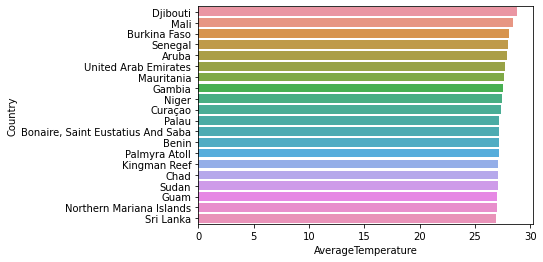

In [27]:
sns.barplot(x=avg_temperature.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y = avg_temperature.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])